<a href="https://colab.research.google.com/github/qkb2/AiSD2022/blob/main/Sprawozdanie_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprawozdanie

Niniejsze sprawozdanie ma na celu przetestowanie wydajności popularnych algorytmów sortowania. Porównane zostaną złożoności obliczeniowe oraz ilość zamian i porównań w zależności od typów ciągów podanych na wejściu każdego algorytmu. Rezultaty zostaną przedstawione na wykresach utworzonych z pomocą biblioteki matplotlib.

### Kod przygotowawczy

Testy będą przeprowadzane na podstawie ciągów wygenerowanych przez generator. Do utworzenia wykresów posłuży plik csv z czasami i liczbą operacji dla każdego sortowania i każdego rodzaju ciągu, który został wykreowany dzięki modułowi pandas.

In [1]:
!git clone https://github.com/qkb2/AiSD2022.git

Cloning into 'AiSD2022'...


In [3]:
import sys
sys.path.insert(0,'/content/AiSD2022')

In [26]:
import generator
import sorts_with_counters
import matplotlib.pyplot as plt
import re
import pandas as pd
from os import path
from IPython import display

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)


x_val = [k for k in range(0, 3000, 300)]

if not path.exists("sort_times.csv"):
    sys.setrecursionlimit(10**8)

    tab_random = generator.random_generator(3000)
    tab_increase = generator.increasing_generator(3000)
    tab_decrease = generator.decreasing_generator(3000)
    tab_a = generator.a_shaped_generator(3000)
    tab_v = generator.v_shaped_generator(3000)

    tabs = [tab_random, tab_increase, tab_decrease, tab_a, tab_v]
    sorts_tab = []

    for name, val in sorts_with_counters.__dict__.items():
        if re.search(".*_sort_wrapper$", name):
            sorts_tab.append(name)

    sorts_data = dict.fromkeys(sorts_tab)
    
    for k in sorts_data.keys():
        sorts_data[k] = []
        for i in range(5):
            sorts_data[k].append({"times": [], "k": []})

    for k in sorts_data.keys():
        for j in range(len(tabs)):
            for i in range(300, 3300, 300):
                t_mn = []
                for o in range(10):
                    srt_dt = getattr(sorts_with_counters, k)(tabs[j][:i])
                sorts_data[k][j]["times"].append(srt_dt[3])
                sorts_data[k][j]["k"].append(srt_dt[1] + srt_dt[2])

    sorts_data["data_types"] = ["random", "increasing", "decreasing", "a shaped", "v shaped"]
    df = pd.DataFrame(sorts_data)
    df.to_csv("sort_times.csv", index=False)
    

with open("sort_times.csv") as sort_times:
    df1 = pd.read_csv(sort_times)
    for k in df1.columns[:-1]:
        df1[k] = df1[k].apply(eval)

## Podział ze względu na sortowania

### Merge sort

Merge sort to rekurencyjny algorytm, który do posortowania ciągu wykorzystuje zasadę "dziel i rządź". Algorytm dzieli ciąg na pół, do momentu aż otrzyma jedno-elementowe ciągi, które później scala w odpowiedniej kolejnośći. Dużą zaletą merge sorta jest fakt, że jego złożoność obliczeniowa jest taka sama w każdym przypadku, i wynosi O(n*log(n)). Tę zależność potwierdzają wykresy czasu od ilości elementów, które dla każdego typu danych wyglądają prawie identycznie. Algorytm radzi sobie tak samo dobrze niezależnie od typu danych jaki otrzyma na wejściu. Wciąż jednak można zauważyć drobne różnice, gdyż ciąg losowy generuje nieco gorsze rezultaty niż pozostałe ciągi.

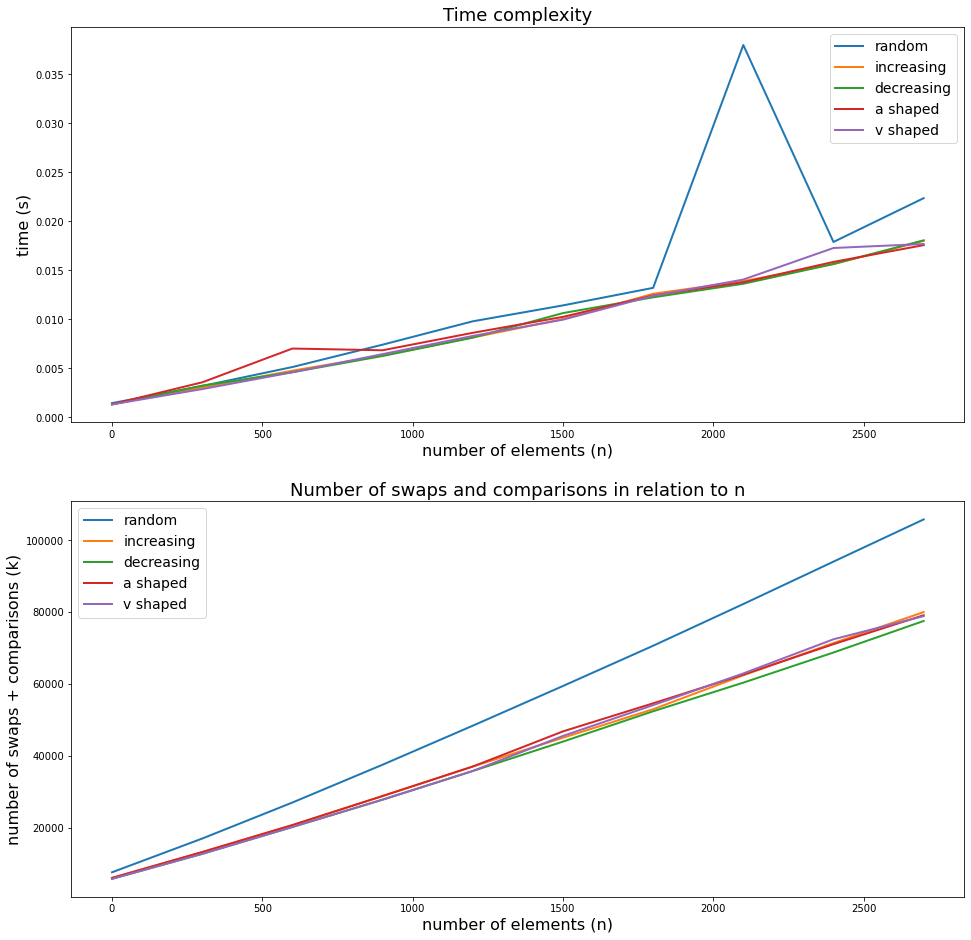

In [37]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "merge_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "merge_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Heap sort

Podobnie jak merge sort, heap sort jest algorytmem rekurencyjnym. Działa on w oparciu o strukturę danych zwaną stertą lub kopcem (heap). Struktura ta jest zbalansowanym drzewem binarnym, które w swoim korzeniu pierwotnym posiada maksymalną/minimalną wartość ciągu, a każdy potomek jest nie większy/nie mniejszy od swojego rodzica. Różnice między danymi różnego typu są dla heap sort pomijalne.

Podobnie jak w przypadku merge sort złożoność obliczeniowa heap sort to O(n*log(n)) w najgorszym i średnim przypadku. Natomiast w najlepszym przypadku jego złożoność to O(n), która występuje gdy wszystkie elementy ciągu mają tę samą wartość - taka sytuacja jest oczywiście bardzo rzadka i prawie niemożliwa do wykrycia w testowaniu.

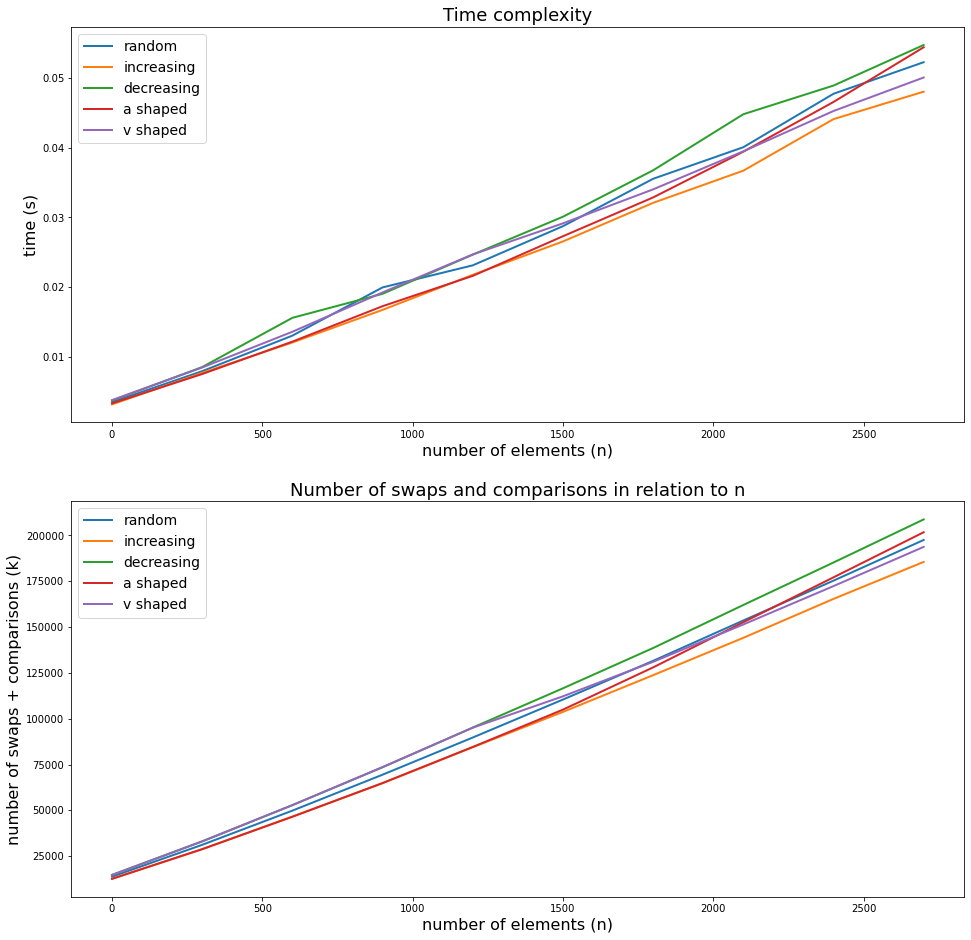

In [38]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "heap_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "heap_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Insertion sort

Insertion sort jest przedstawicielem algorytmów prymitywnych w naszym zestawieniu. Sortuje ciąg startując na początku listy i z każdą iteracją porównuje następny element z poprzednimi, po czym wstawia go na odpowiednie miejsce. Jego zaletą jest prostota i łatwość implementacji. Natomiast dużą wadą jest oczywiście złożoność obliczneniowa, która w najgorszym i średnim przypadku wynosi O(n^2). W najlepszym przypadku złożoność to O(n), jednak jak widać na wykresie występuje ona tylko w przypadku ciągów malejącego oraz w kształcie litery A. Czyni to insertion sort algorytmem przydatnym przede wszystkim w przypadku ciągów posortowanych.

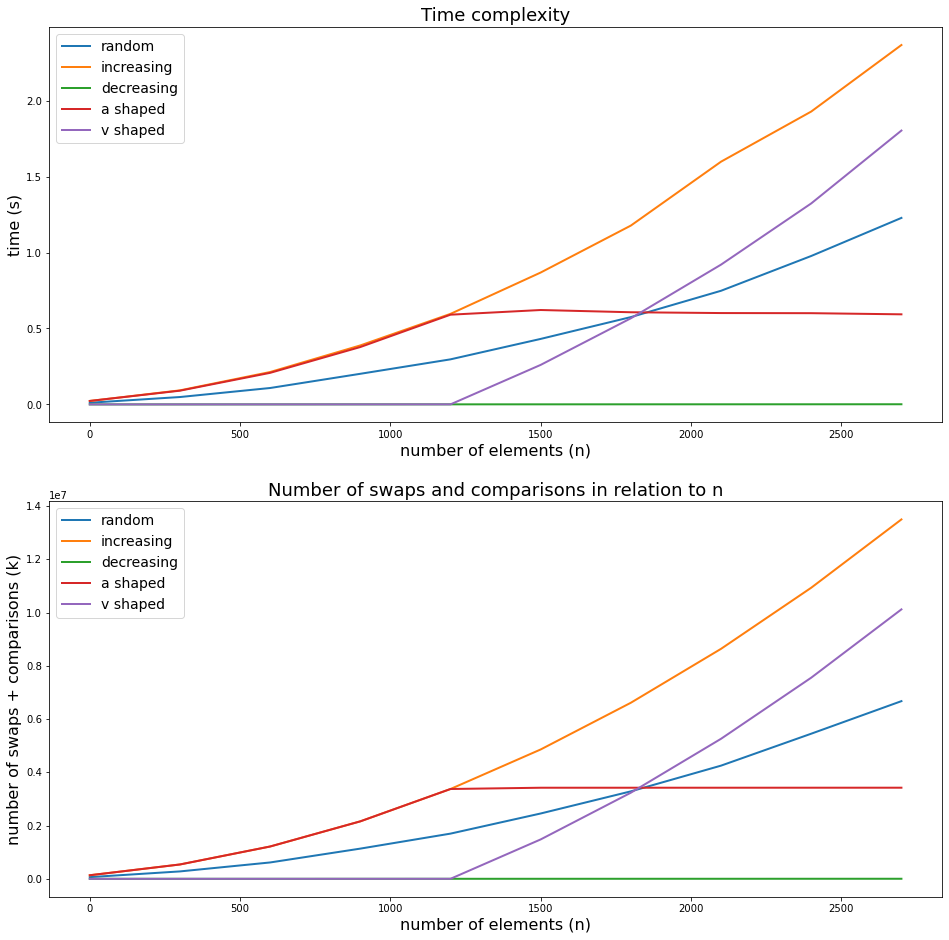

In [39]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "insertion_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "insertion_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Shell sort

Shell sort jest algorytmem mającym wiele możliwych implementacji (czy raczej - rodziną algorytmów). Nasz shell sort można nazwać formą usprawnionego insertion sort z powodu jego działania. Różni się od niego jedynie tym, że porównuje ze sobą oraz zamienia wartości, które oddalone są od siebie o pewien przyrost, po czym w naszym algorytmie kolejne przyrosty są coraz mniejszymi elementami sekwencji Knutha (wyliczanej ze wzoru: a_(n+1) = 3a_n + 1).

Jak widać po wykresie algorytm ten osiąga nieco lepsze czasy niż insertion sort, lecz jego złożoność obliczeniowa jest tylko nieco lepsza i wynosi O(n^2) lub O(n^(3/2)) - zależnie od impementacji w przypadkach pesymistycznym i średnim oraz O(n) w przypadku optymistycznym. Analogicznie do insertion sort, shell sort radzi sobie najlepiej z ciągami malejącymi.

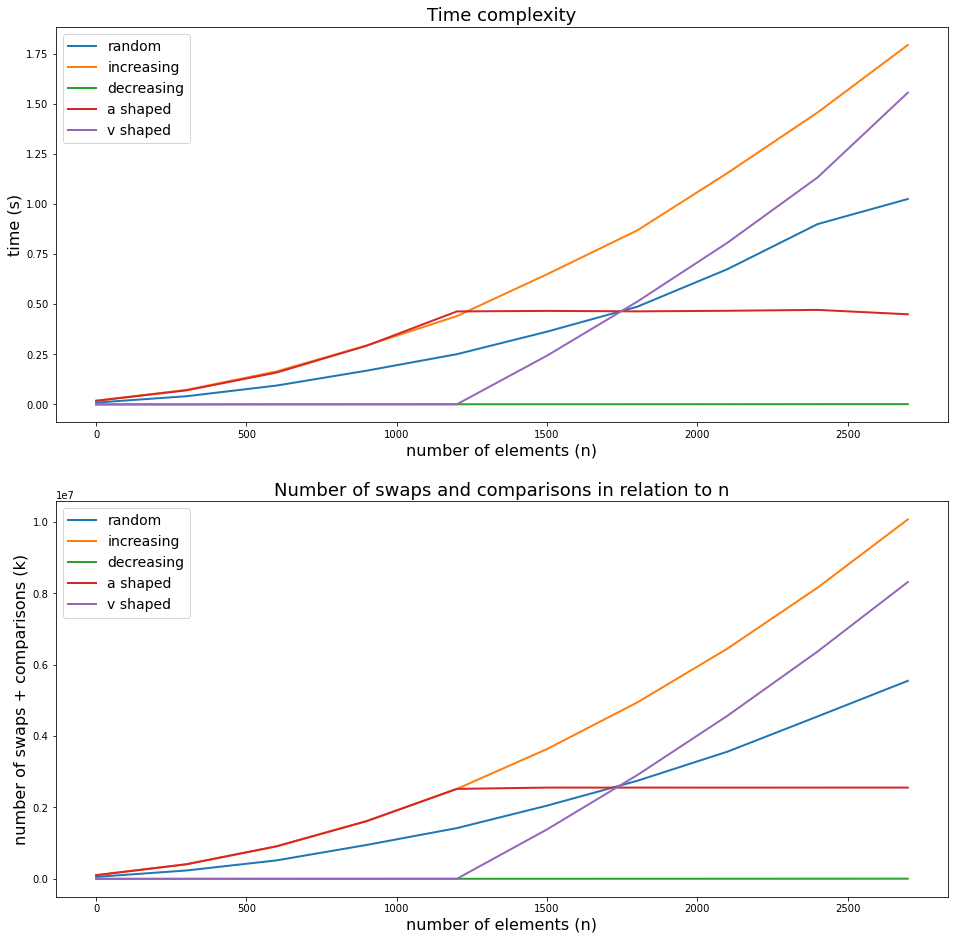

In [40]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "shell_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "shell_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

### Quick sort

Quick sort jest jednym z najpopularniejszych algorytmów sortujących. Ma on wiele różniących się od siebie pewnymi istotnymi szczegółami wariacji. W wyniku naszych eksperymentów z algorytmem potwierdziliśmy pewne właściwości quick sort czyniące go algorytmem specyficznym i w naszej opinii jednym z algorytmów, na które programista powinien uważać przy doborze implementacji.

Istnieją dwa popularne schematy implementacji quick sort - schemat Lomuto oraz schemat Hoare'a. Schemat Hoare'a jest szybszy od schematu Lomuto, jednakże z powodu bycia opartym na pętlach while zamiast pętlach for ma on tendencję do bycia niezbezpieczniejszym w implemetancji. Przykładowo niektóre implementacje schematu Lomuto mogą wpadać w nieskończoną pętle dla pewnych zestawów danych, gdy za pivot wybierze się ostatni element tablicy.

Wybór pivota zdaje się być również istotnym elementem algorytmu - przy wyborze pivota jako ostatniego elementu ciągu przy sortowaniu ciągów już posortowanych nasz algorytm będzie miał złożoność O(n^2) - jest to przypadek pesymistyczny. Dla ciągów losowych złożoność jest już bardzo dobra i wynosi O(n*log(n)) - algorytm dla ciągów losowych jest więc bardzo szybki i skuteczny.

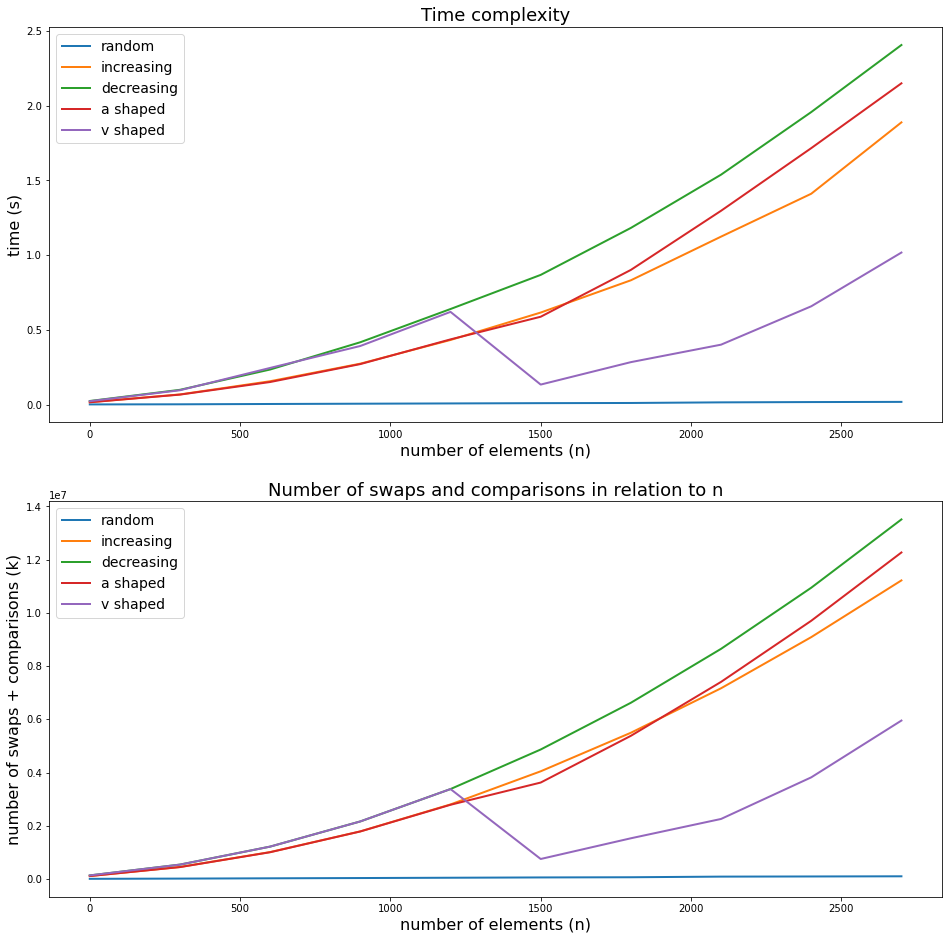

In [41]:
plt.figure(figsize=(16,16))

plt.subplot(2, 1, 1)
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Time complexity", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "quick_sort_wrapper"]["times"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

plt.subplot(2, 1, 2)
plt.ylabel("number of swaps + comparisons (k)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)
plt.title("Number of swaps and comparisons in relation to n", fontsize=18)

for i in range(0, len(df1.index.values)):
    plt.plot(x_val, df1.at[i, "quick_sort_wrapper"]["k"], linewidth=2, label=df1.at[i, "data_types"])
    
plt.legend(fontsize=14)

## Podział ze względu na typy danych

### Ciąg losowy

...

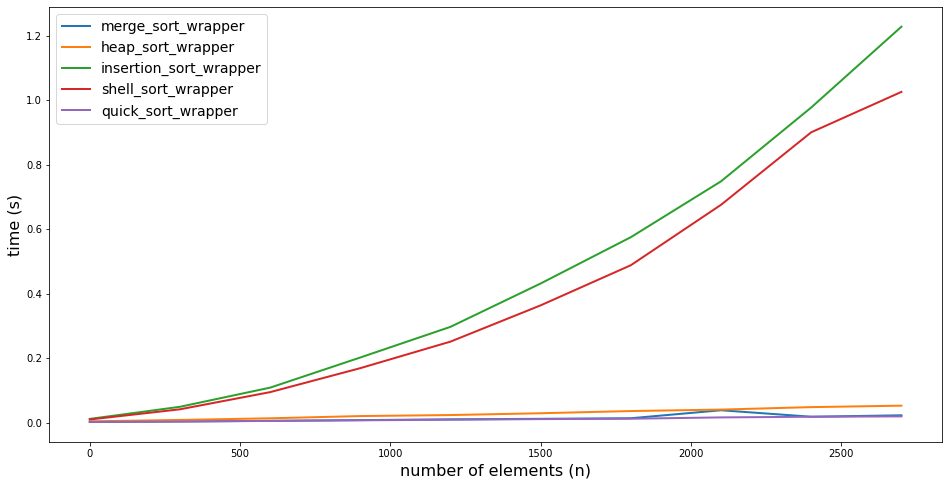

In [42]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val,
        df1.at[0, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg rosnący

Z ciągiem rosnącym dobrze radzą sobie heap sort oraz merge sort - oba algorytmy sortują go ze złożonością O(n*log(n)). Wszystkie inne algorytmy mają tu złożoność O(n^2).

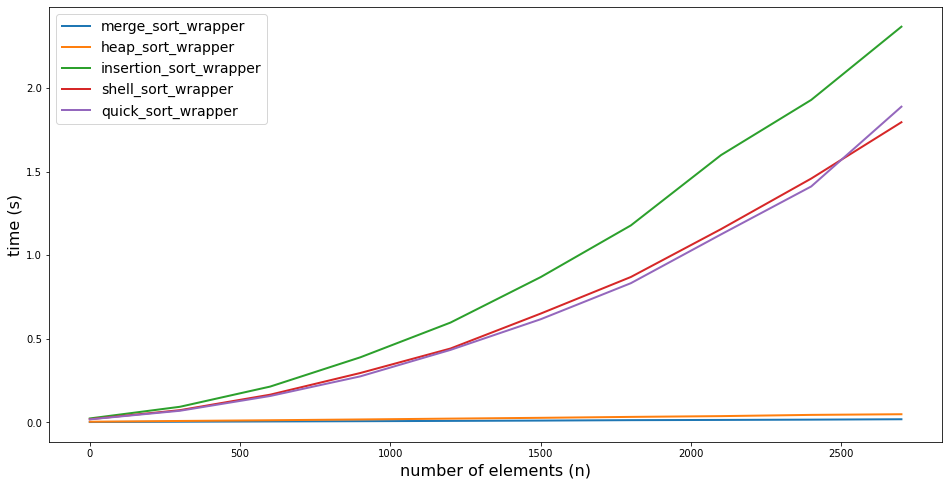

In [43]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val,
        df1.at[1, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg malejący

W przypadku ciągu malejącego najgorzej radzi sobie quicksort, który ma złożoność O(n^2) dla ciągu już ułożonego. Reszta algorytmów jest albo ogólnie bardzo szybka i ma złożoność nlog(n) (heap sort, merge sort), albo sortuje ciąg malejący w czasie liniowym (shell sort, insertion sort).

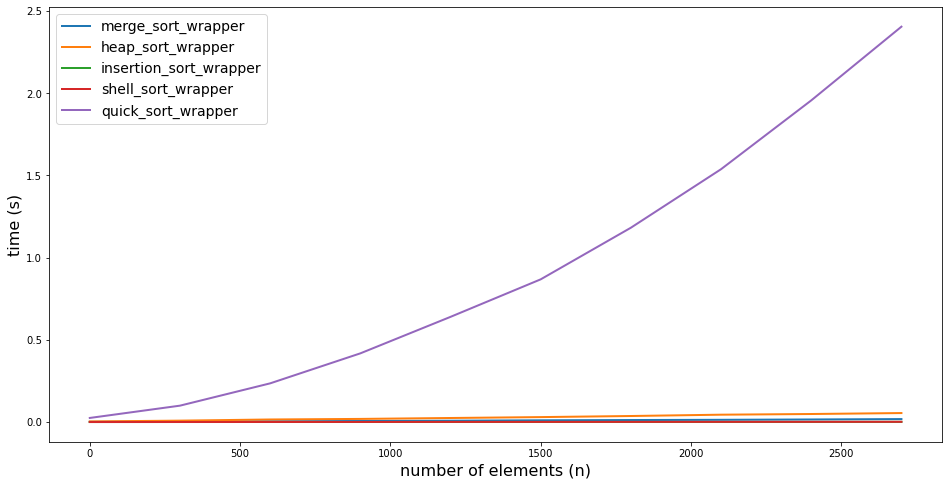

In [44]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val,
        df1.at[2, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg w kształcie A

Dla ciągu A-kształtnego wyjątkowe źle zdaje się działać insertion sort. Następnie shell sort i quick sort osiągają tu złożoność gorszą niż nlog(n), ale nieco lepszą niż n^2, zaś heap sort i merge sort nadal działają w bardzo dobrym czasie nlog(n).

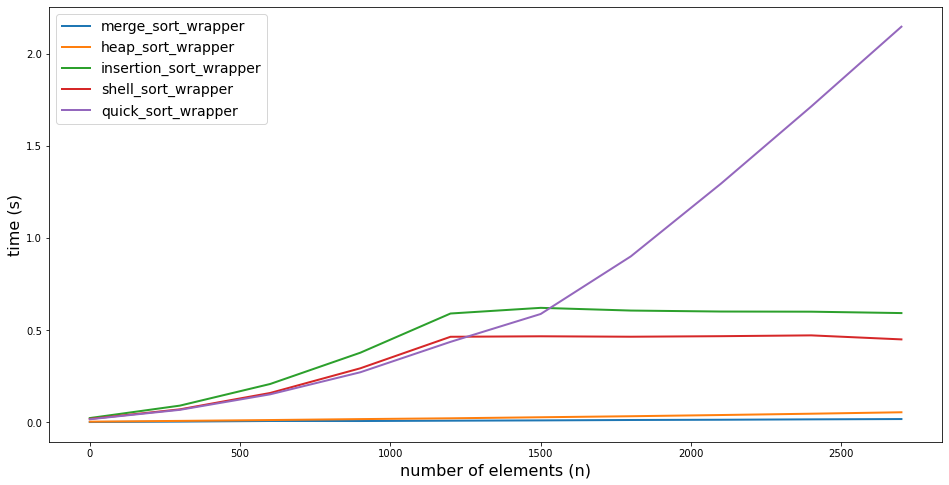

In [45]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val,
        df1.at[3, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)

### Ciąg w kształcie  V

Ciąg V-kształtny zdaje się zachowywać dla naszych algorytmów i przyjętnych wartości podobnie do ciągu malejącego.

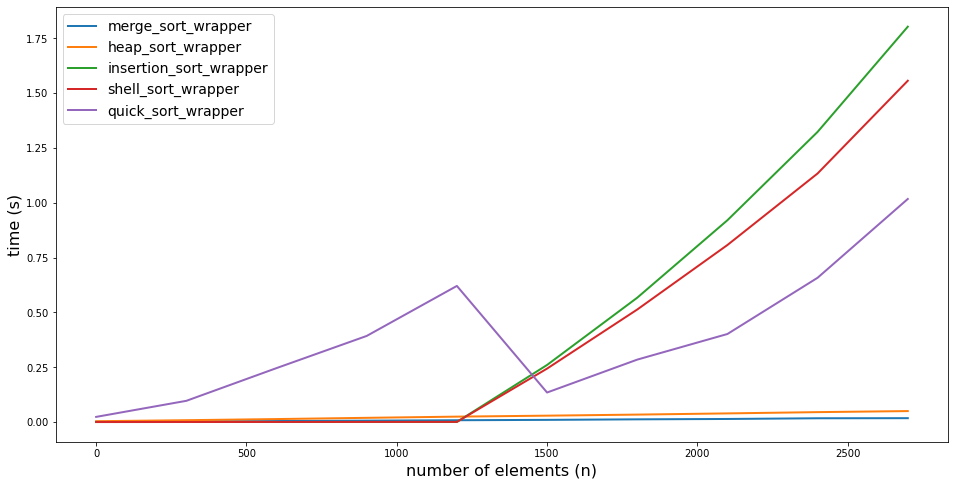

In [46]:
plt.figure(figsize=(16,8))
plt.ylabel("time (s)", fontsize=16)
plt.xlabel("number of elements (n)", fontsize=16)

for k in df1.columns[:-1]:
    plt.plot(
        x_val if k not in ["insertion_sort_wrapper", "shell_sort_wrapper", "quick_sort_wrapper"] else x_val,
        df1.at[4, k]["times"], linewidth=2, label=k)
    
plt.legend(fontsize=14)